# Урок 7
##### Визуализация данных

In [1]:
# 2020 https://geo-python-site.readthedocs.io/en/latest/lessons/L7/overview.html

import os
import pandas as pd
import numpy as np

# Корректное отображение графиков в jupyter
%matplotlib inline

In [2]:
# Текущая директория
ROOT_PATH = os.path.abspath(os.curdir)

#### Цели обучения:

- Создание базовых графиков x-y данных с помощью Pandas/Matplotlib

- Манипулирование форматами графиков

- Создавайте графики в блокнотах Jupyter или сохраняйте их в виде отдельных графических файлов



#### Построение графиков на Python
![](img/landscape-colors.png)

Библиотеки для построения графиков, доступные Python. Источник:
https://pyviz.org/overviews/index.html.

Python имеет много хороших, полезных библиотек, которые могут быть использованы для построения графиков. На рисунке выше вы можете увидеть ряд доступных параметров библиотеки построения графиков, а также то, как они связаны друг с другом. Из вышеперечисленных вариантов мы хотели бы выделить:

- [**Matplotlib**](https://matplotlib.org/) - "великий старик из Python plotting" (галерея [Matplotlib](https://matplotlib.org/gallery.html))

    - [**Matplotlib Basemap**](https://matplotlib.org/basemap/index.html)-плагин Matplotlib для визуализации карт в Python (галерея [Matplotlib basemap](https://matplotlib.org/basemap/users/examples.html))

    - [**Seaborn**](https://seaborn.pydata.org/)-высокоуровневый интерфейс для рисования привлекательной статистической графики, построенный поверх Matplotlib (галерея [Seaborn](https://seaborn.pydata.org/examples/index.html))

- [**Bokeh**](https://docs.bokeh.org/en/latest/)-современная библиотека построения графиков для статических / интерактивных веб-графиков, таких как графики, карты, диаграммы и т.д. (галерея [Bokeh](https://docs.bokeh.org/en/latest/docs/gallery.html))

- [**Plotly**](https://plotly.com/python/)-современная библиотека построения графиков для статических / интерактивных веб-графиков, таких как графики, карты, диаграммы и т.д. Некоторые функции являются коммерческими. (галерея [Plotly](https://plotly.com/python/basic-charts/))

- [**Dash**](https://plotly.com/dash/)-это платформа Python для построения аналитических веб-приложений. JavaScript не требуется.

- [**ggplot**](https://yhat.github.io/ggpy/)-знакомы с построением графиков в R с помощью ggplot2? Вы также можете использовать ggplot в Python! (примеры [ggplot](https://yhat.github.io/ggpy/))

- [**HoloViews**](https://holoviews.org/) и [**GeoViews**](https://geoviews.org/)-пусть данные визуализируют себя. (смотрите это вводное видео [HoloViews](https://www.youtube.com/watch?v=hNsR2H7Lrg0))

    - Современные и мощные библиотеки визуализации, построенные на основе Matplotlib и Bokeh, что делает изучение и визуализацию ваших данных быстрее, чем когда-либо прежде

    - HoloViews предназначен для базового построения графиков (учебник [HoloViews](https://holoviews.org/Tutorials/index.html) и примеры [HoloViews](https://holoviews.org/Tutorials/index.html))

    - GeoViews предназначен для создания красивых и интерактивных карт (галерея [ GeoViews](https://geoviews.org/gallery/index.html))

### Основы построения графиков
На следующем рисунке показаны различные элементы базового линейного графика.
![](img/basic-elements-of-plot.png)

#### Общие термины построения графиков
Эти общие термины могут немного отличаться в зависимости от используемой библиотеки построения графиков, но это некоторые типичные термины, используемые, например, при построении графиков в Matplotlib.

- **axis**-оси графика, которые обычно являются x, y и z (для 3D-графиков).

- **title**-Название всего сюжета.

- **label**-название для всей оси.

- **legend**-легенда для сюжета.

- **tick label** - текст или значения, которые представлены на оси.

- **symbol**-символ для точек данных (на точечной диаграмме), которые могут быть представлены различными формами символов/цветами.

- **size**-Размер, например, точки на точечном графике. Также используется для ссылки на размеры текста на графике.

- **linestyle**-стиль, в котором должна быть проведена линия. Может быть сплошным или пунктирным, например.

- **linewidth**-ширина линии на графике.

- **alpha**-уровень прозрачности заполненного элемента на графике (значения от 0.0 (полностью прозрачный) до 1.0 (без trasnparency)).

- **tick(s)** - относится к Галочкам на графике.

- **annotation**-относится к тексту, добавленному к сюжету.

- **padding**-расстояние между меткой (ось/галочка) и осью.

# Чтение данных

In [3]:
# Загрузка данных в папку data
# https://davewhipp.github.io/data/Finland-weather-data-L7.tar.gz
# список полученных файлов и директорий
print(os.listdir(os.path.join(ROOT_PATH,r'data')))

['.ipynb_checkpoints', '._3505doc.txt', '._6367598020644inv.txt', '._6367598020644stn.txt', '029740.txt', '3505doc.txt', '6367598020644inv.txt', '6367598020644stn.txt', 'PaxHeader']


### О данных
В рамках загрузки есть ряд файлов, которые описывают погодные данные. Эти файлы метаданных включают в себя:

- Список станций: data/6367598020644stn.txt

- Подробная информация о погодных наблюдениях на каждой станции: data/6367598020644inv.txt

- Описание данных (например, имена столбцов): data/3505doc.txt

In [4]:
# чтение Список станций
fp = os.path.join(ROOT_PATH,r'data\6367598020644stn.txt')

In [5]:
# считывает данные, используя различное количество пробелов в качестве разделителя
# отбросим первую строку содержащую "----" 
df = pd.read_csv(fp, delim_whitespace=True, skiprows=[1])
df.head()

,USAF-WBAN_ID,STATION,NAME,COUNTRY,STATE,LATITUDE,LONGITUDE,ELEVATION
0,28360,99999,SODANKYLA,FINLAND,+67.395,26.619,183.50,NaN
1,28690,99999,KUUSAMO,FINLAND,+65.988,29.239,264.00,NaN
2,28750,99999,OULU,FINLAND,+64.930,25.355,14.30,NaN
3,28970,99999,KAJAANI,FINLAND,+64.285,27.692,147.20,NaN
4,29070,99999,KALAJOKI,ULKOKALLA,FINLAND,64.333,23.45,5.0


In [6]:
df['USAF-WBAN_ID'].unique()

array([28360, 28690, 28750, 28970, 29070, 29110, 29170, 29350, 29440,
       29500, 29700, 29720, 29740, 29810, 29820], dtype=int64)

In [7]:
df.columns

Index(['USAF-WBAN_ID', 'STATION', 'NAME', 'COUNTRY', 'STATE', 'LATITUDE',
       'LONGITUDE', 'ELEVATION'],
      dtype='object')

In [8]:
# Подробная информация о погодных наблюдениях на каждой станции
fp = os.path.join(ROOT_PATH,r'data\6367598020644inv.txt')
# считывает данные, используя различное количество пробелов в качестве разделителя
# отбросим первую строку содержащую "----" 
# df = pd.read_csv(fp, delim_whitespace=True, skiprows=[1])
df = pd.read_csv(fp)
df.head()

,028360 99999 SODANKYLA 1917 93 84 93 90 93 90 93 93 90 93 90 93
0,028360 99999 SODANKYLA 19...
1,028360 99999 SODANKYLA 19...
2,028360 99999 SODANKYLA 19...
3,028360 99999 SODANKYLA 19...
4,028360 99999 SODANKYLA 19...


In [9]:
df.columns

Index(['028360 99999 SODANKYLA                      1917   93   84   93   90   93   90   93   93   90   93   90   93'], dtype='object')

In [10]:
# Подробная информация о погодных наблюдениях на каждой станции
fp = os.path.join(ROOT_PATH,r'data\029740.txt')
# считывает данные, используя различное количество пробелов в качестве разделителя
# замена * на NaN, выберем только колонки 'YR--MODAHRMN', 'TEMP', 'MAX', 'MIN', 
""" 
parse_dates - принимает список имен столбцов Python, содержащий данные даты, которые панды будут анализировать 
и преобразовывать в тип данных datetime. Для многих распространенных форматов дат этот параметр 
автоматически распознает и преобразует данные даты.

index_col используется для указания столбца, который должен использоваться для индексации данных 
в фрейме данных. В этом случае мы получаем наши данные о дате в качестве индекса фрейма данных. 
Это очень полезная функция в панд, как мы увидим ниже.
"""
df = pd.read_csv(fp, delim_whitespace=True, 
                 na_values=['*', '**', '***', '****', '*****', '******'],
                 usecols=['YR--MODAHRMN', 'TEMP', 'MAX', 'MIN'],
                 parse_dates=['YR--MODAHRMN'], index_col='YR--MODAHRMN'
                )
df.head()

,TEMP,MAX,MIN
YR--MODAHRMN,,,
1952-01-01 00:00:00,36.0,NaN,NaN
1952-01-01 06:00:00,37.0,NaN,34.0
1952-01-01 12:00:00,39.0,NaN,NaN
1952-01-01 18:00:00,36.0,39.0,NaN
1952-01-02 00:00:00,36.0,NaN,NaN


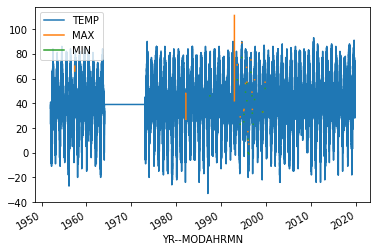

In [11]:
# построим график (встроенный механизм Pandas)
ax = df.plot()

In [12]:
type(ax)

matplotlib.axes._subplots.AxesSubplot

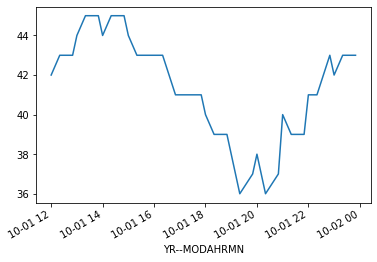

In [13]:
# построим график наблюдаемых температур в столбце data['TEMP'] 
# и ограничимся наблюдениями с полудня 1 октября 2019 года -> 201910011200
oct_1_2019 = df["TEMP"].loc[df.index >= '201910011200']
ax = oct_1_2019.plot.line()

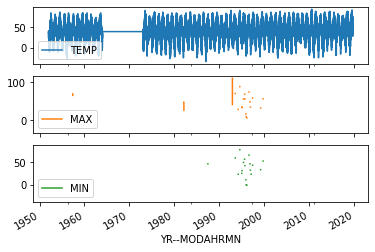

In [14]:
# Отдельные графики, цвета случайные
ax = df.plot.line(subplots=True)

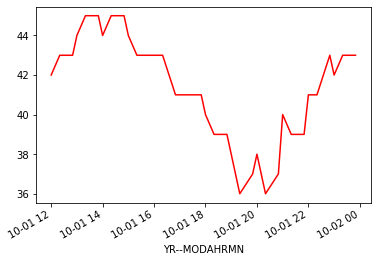

In [15]:
ax = oct_1_2019.plot.line(color={"TEMP":"red"})

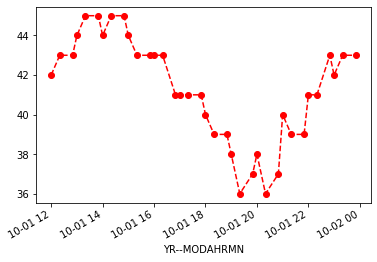

In [16]:
# стиль: цвет - красный, узлы - круг, линия прерывистая - "--" линия сплошная - "-" , нет линии -""
ax = oct_1_2019.plot.line(style="ro--")

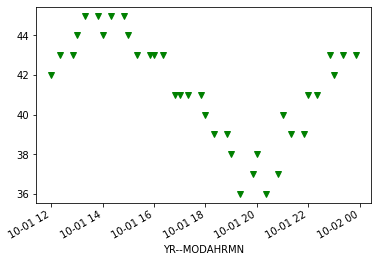

In [17]:
ax = oct_1_2019.plot.line(style="gv")

In [ ]:
# справка
help(oct_1_2019.plot)

<AxesSubplot:>

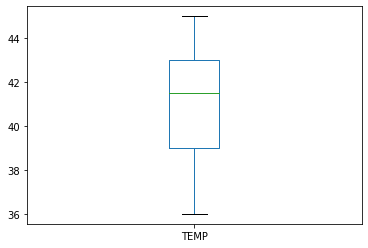

In [19]:
# boxplot
oct_1_2019.plot.box()

<AxesSubplot:xlabel='YR--MODAHRMN'>

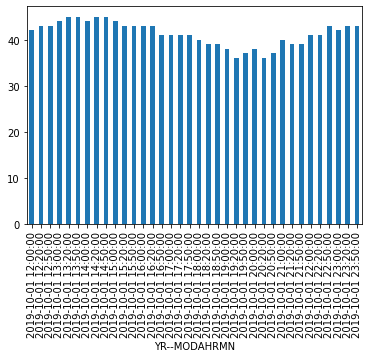

In [20]:
#
oct_1_2019.plot.bar()

<AxesSubplot:xlabel='YR--MODAHRMN'>

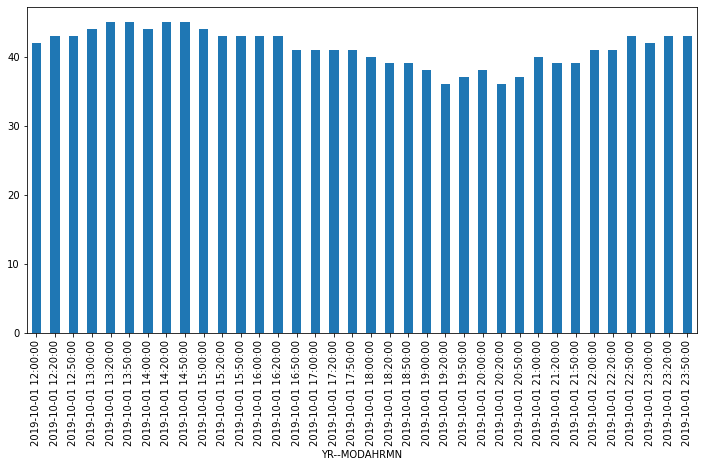

In [21]:
# Для получения больших возможностей, для настройки гафиков, задействуем Matplotlib
import matplotlib.pyplot as plt
# устанавливаем размер участка по умолчанию-12 дюймов в ширину и 6 дюймов в высоту. 
# Не стесняйтесь менять эти значения
plt.rcParams['figure.figsize'] = [12, 6]
oct_1_2019.plot.bar()

In [22]:
# Текст на экране
ax.text(1, 2, "Текст на экране")

Text(1, 2, 'Текст на экране')

<AxesSubplot:xlabel='YR--MODAHRMN'>

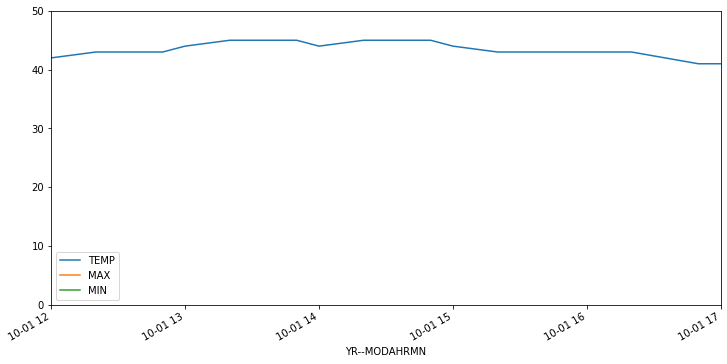

In [23]:
# Диапазон по X и по Y
# df.plot(xlim=[xmin, xmax], ylim=[ymin, ymax])
df.plot(xlim=['201910011200', '201910011700'], ylim=[0, 50])

In [24]:
# строка  -> datatime
pd.to_datetime("201910011700")

Timestamp('2019-10-01 17:00:00')

#### Задача:
1. Ограничьте наш временной диапазон с 12: 00 до 15: 00 1 октября 2019 года

1. Смотрите только на температуру между 40-46° по Фаренгейту

1. Добавьте текст, чтобы отметить самую холодную часть середины дня.

42.0
2019-10-01T12:00:00.000000000


Text(2019-10-01T12:00:00.000000000, 42.0, '    <- Самая холодная температура в середине дня')

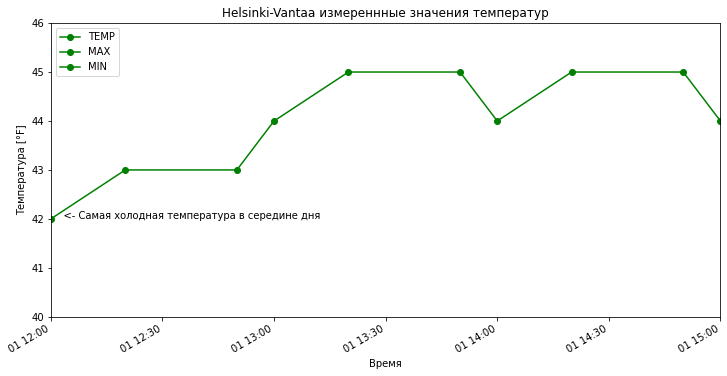

In [25]:
# 1
start_time = "201910011200"
stop_time = "201910011500"
# 2 
min_temp = 40
max_temp = 46
# 3
cold_temp = df[(df.index >= "201910011200") & (df.index <= "201910011500")].min()
print(cold_temp.values[0])
cold_data = df[(df.index >= "201910011200") & (df.index <= "201910011500") & (df.TEMP == cold_temp.values[0])].index
print(cold_data.values[0])

# строим график
ax = df.plot.line(xlim=[start_time, stop_time], ylim=[min_temp, max_temp], style="go-", 
                  title='Helsinki-Vantaa измереннные значения температур')
ax.set_xlabel("Время")
ax.set_ylabel("Температура [°F]")
ax.text(str(cold_data.values[0]), cold_temp.values[0], "    <- Самая холодная температура в середине дня")

### Задача 2:
- Данные о температуре воздуха с 18:00 до 24:00 1 октября 2019 года

- Пунктирная черная линия, соединяющая наблюдения (не показывать точки данных)

- Заголовок гласит: “вечерняя температура 1 октября, Хельсинки-Вантаа”

- Текстовая метка указывающая самую теплую температуру в вечернее время

42.0
2019-10-01T12:00:00.000000000


Text(2019-10-01T22:50:00.000000000, 43.0, ' <- Самая теплая температура в вечернее время')

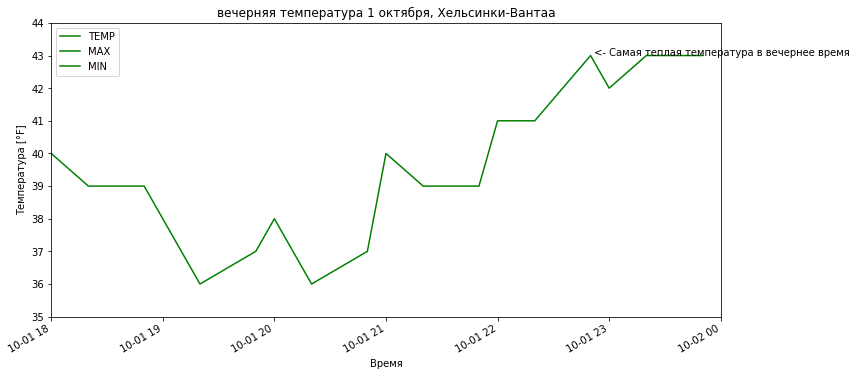

In [26]:
# 1
start_time = "201910011800"
stop_time = "201910020000"
min_temp = df["TEMP"][(df.index >= start_time) & (df.index <= stop_time)].min() - 1
max_temp = df["TEMP"][(df.index >= start_time) & (df.index <= stop_time)].max() + 1
# 2-3
hot_temp = df[(df.index >= start_time) & (df.index <= stop_time)].max()
print(cold_temp.values[0])
hot_data = df[(df.index >= start_time) & (df.index <= stop_time) & (df.TEMP == hot_temp.values[0])].index
print(cold_data.values[0])

# строим график
ax = df.plot.line(xlim=[start_time, stop_time], ylim=[min_temp, max_temp], style="g-", 
                  title='вечерняя температура 1 октября, Хельсинки-Вантаа')
ax.set_xlabel("Время")
ax.set_ylabel("Температура [°F]")
ax.text(str(hot_data.values[0]), hot_temp.values[0], " <- Самая теплая температура в вечернее время")

### График Bar в Pandas

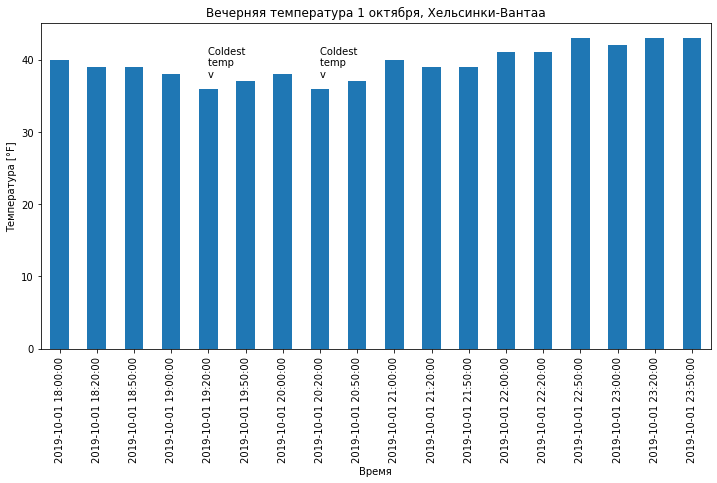

In [27]:
# 1
start_time = "201910011800"
stop_time = "201910020000"
min_temp = df["TEMP"][(df.index >= start_time) & (df.index <= stop_time)].min() - 1
max_temp = df["TEMP"][(df.index >= start_time) & (df.index <= stop_time)].max() + 1
# 2-3
# выборка по временному диапазону
oct1_afternoon = df[(df.index >= start_time) & (df.index <= stop_time)]
# минимальная температура в выборке
cold_temp = oct1_afternoon.min()
# список значений температуры в выборке
temp_list = oct1_afternoon["TEMP"].to_list()

# cold_data = oct1_afternoon[oct1_afternoon.TEMP == cold_temp.values[0]]
# print(cold_data.TEMP)

# строим график
ax = oct1_afternoon["TEMP"].plot.bar(title='Вечерняя температура 1 октября, Хельсинки-Вантаа')
ax.set_xlabel("Время")
ax.set_ylabel("Температура [°F]")

# поиск минимального значения в списке и установка метки на графике
for c, temp_obs in enumerate(temp_list):
    if temp_obs == cold_temp["TEMP"]:
        ax.text(c, cold_temp.values[0], 'Coldest \ntemp \nv \n')
plt.savefig('img/bar-plot.png', dpi=600)

Вы можете найти более подробную информацию о том, как форматировать гистограммы [**на веб-сайте документации Pandas**](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html).



#### Pandas-Bokeh интерактивное построение графика 
pip install pandas_bokeh

In [28]:
import pandas_bokeh

# Устанавливаем выходные данные для отображения в записной книжке, а не в отдельном окне
pandas_bokeh.output_notebook()
# Устанавливаем программное обеспечение для построения графиков на использование Pandas-Bokeh,а не Matplotlib
pd.set_option('plotting.backend', 'pandas_bokeh')

Loading BokehJS ...

Теперь мы можем рассмотреть примерный график, аналогичный тому, с которого мы начали, но с данными за три дня (29 сентября-1 октября 2019 года). Pandas-Bokeh ожидает фрейм данных в качестве источника для данных графика, поэтому нам нужно будет создать временной срез графика. **df** Фрейм данных, содержащий желаемый диапазон дат перед построением графика. Давайте создадим сюжет Pandas-Bokeh и посмотрим, что отличается.

In [64]:
# три дня
sep29_oct1 = df.loc[df.index >= '201909290000']
# диапазоны
start_time = "201909290000"
stop_time = "201910020000"
min_temp = sep29_oct1["TEMP"].min() - 1
max_temp = sep29_oct1["TEMP"].max() + 1

# строим график
ax = sep29_oct1.plot(title='Helsinki-Vantaa temperatures',
                     xlabel='Date', ylabel='Temperature [°F]',
                     xlim=[start_time, stop_time], ylim=[min_temp, max_temp],
                     plot_data_points=True
                     )

Несколько небольших изменений, чтобы создать этот сюжет:

- Нам нужно использовать фрейм данных в качестве источника данных для сюжета, а не Серию панд. Таким образом, **data['TEMP'].plot()** не будет работать с Pandas-Bokeh.

- Метки по осям x и y задаются с помощью **xlabel** и **ylabel** параметры, а не использование **ax.set_xlabel()** или **ax.set_ylabel()**.

- Цвет линии и построение точек не задаются с помощью **style** ключевое слово. Вместо этого цвета линий можно было бы задать с помощью **color** или **colormap**. Построение графиков точек осуществляется с помощью **plot_data_points** параметр (см. ниже). Более подробную информацию о форматировании строк можно найти на странице [Сайт Pandas-Bokeh](https://github.com/PatrikHlobil/Pandas-Bokeh).

- Мы не включили текстовую метку на сюжет, так как это может быть невозможно сделать с Pandas-Bokeh.